# Bike Sharing Prediction - Group A

- ALEJANDRO ALCUAZ TEMIÑO
- ALEJANDRO SILVA HERNANDEZ
- BOHAN CHOU
- FRANCISCO KELLY
- MARTINA WEBERRUSS
- SAMI JAHEL
- XAVER ROBERT ALBERS-SCHÖNBERG 


<img src="https://images.unsplash.com/photo-1487248805249-9af00e9cc487?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1650&q=80" width = 700>

Our report is composed of 3 parts:

## 1. Exploratory Data Analysis (descriptive analytics) 
- Time-related Data
- Weather-related Data
- User related data

## 2. Data Engineering 
- Imputing missing values
- Creating new features

## 3. Machine Learning (predictive analytics)
- Preprocessing
- Cross validation with baseline models
- Tuning hyperparameters
- Plotting predictions & residuals



# 0. Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://gist.githubusercontent.com/hannahbhchou/c2a833cc2dc2a2b859fdad16f97ee809/raw"

In [3]:
df = pd.read_csv(url, index_col="instant")

In [4]:
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


# 1. Exploratory Data Analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   hr          17379 non-null  int64  
 2   weathersit  17279 non-null  object 
 3   temp        17280 non-null  float64
 4   atemp       17279 non-null  float64
 5   hum         17279 non-null  float64
 6   windspeed   17279 non-null  float64
 7   casual      17379 non-null  int64  
 8   registered  17379 non-null  int64  
 9   cnt         17379 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.5+ MB


In [6]:
df.shape # Get number of rows and columns of the dataframe

(17379, 10)

In [7]:
# Construct a dataframe with the metainfo of the dataset
pd.set_option("precision", 3) # Change precision of float numbers to 3 digits
df_info = pd.DataFrame(df.dtypes)
df_info["missing"] = df.isnull().sum()
df_info["unique"] = df.nunique()
df_info["count"] = df.count()
df_info["min"] = df.min()
df_info["max"] = df.max()
df_info["mean"] = df.mean()
df_info["stdev"] = df.std()
df_info

,0,missing,unique,count,min,max,mean,stdev
dteday,object,0,731,17379,2011-01-01,2012-12-31,NaN,NaN
hr,int64,0,24,17379,0,23,11.547,6.914
weathersit,object,100,4,17279,NaN,NaN,NaN,NaN
temp,float64,99,50,17280,0.02,1,0.497,0.192
atemp,float64,100,65,17279,0,1,0.476,0.172
hum,float64,100,89,17279,0,1,0.627,0.193
windspeed,float64,100,30,17279,0,0.851,0.190,0.122
casual,int64,0,322,17379,0,367,35.676,49.305
registered,int64,0,776,17379,0,886,153.787,151.357
cnt,int64,0,869,17379,1,977,189.463,181.388


In [8]:
# Analyze dataset - numerical datatypes
df.describe(include=["number"])

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17280.000,17279.000,17279.000,17279.000,17379.000,17379.000,17379.000
mean,11.547,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,6.914,0.192,0.172,0.193,0.122,49.305,151.357,181.388
min,0.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,6.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,12.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,18.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,23.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


In [9]:
# Analyze dataset - numerical datatypes
df.describe(include=["object"])

,dteday,weathersit
count,17379,17279
unique,731,4
top,2012-11-12,"Clear, Few clouds, Partly cloudy, Partly cloudy"
freq,24,11345


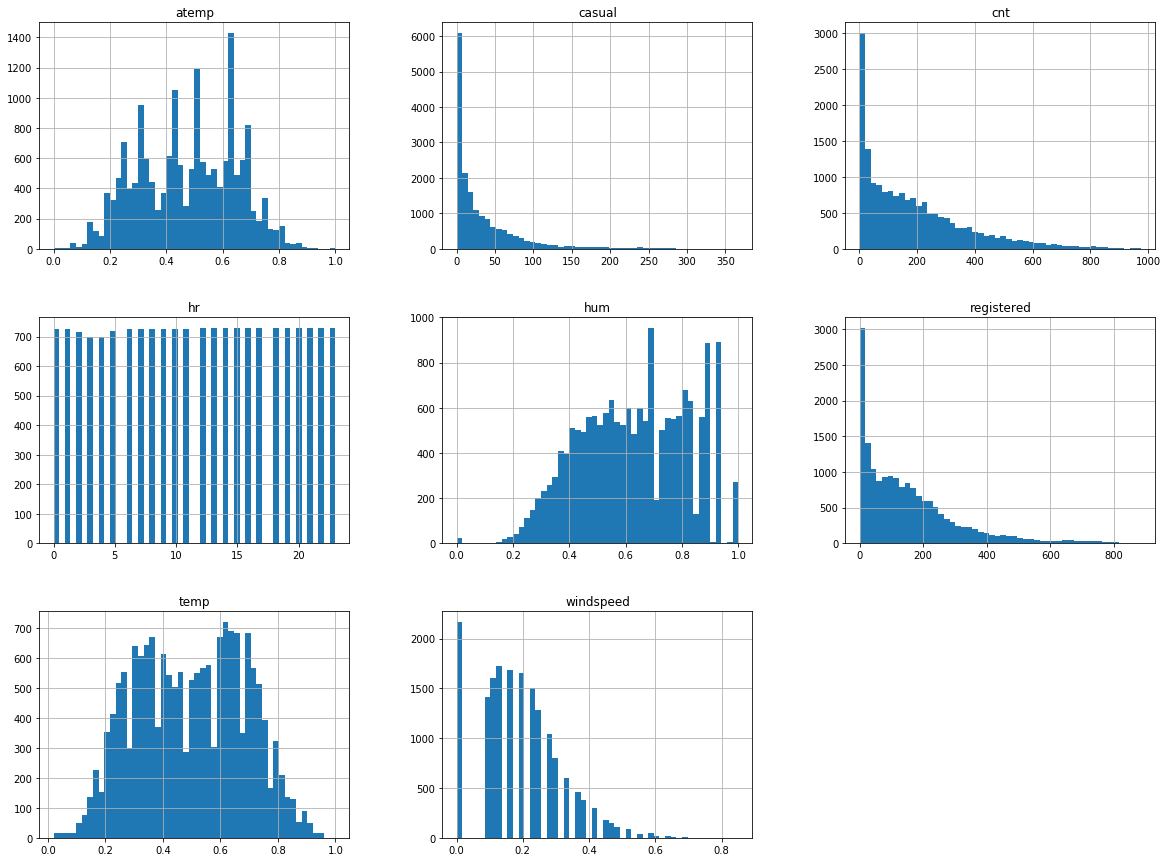

In [10]:
df.hist(bins=50,figsize=(20,15));

**We have several different types of variables:**
- time related data: dteday, hr
- weather-related data: temp, atemp, hum, windspeed
- bike-user related data: casual, registered, cnt

In the following, we will further explore these features

### 1.1 Time-related data

In [11]:
# What we already know
df_info.loc[["dteday","hr"]]
# dteday : date
# hr : hour (0 to 23)

,0,missing,unique,count,min,max,mean,stdev
dteday,object,0,731,17379,2011-01-01,2012-12-31,NaN,NaN
hr,int64,0,24,17379,0,23,11.547,6.914


In [12]:
# Transform dteday to datetype
df["dteday"] = pd.to_datetime(df["dteday"], format="%Y-%m-%d")
df["dteday"].dtype

dtype('<M8[ns]')

In [13]:
df['year']= pd.DatetimeIndex(df['dteday']).year
df['month']= pd.DatetimeIndex(df['dteday']).month
df['day']= pd.DatetimeIndex(df['dteday']).day
df['day_name']=df['dteday'].dt.day_name()
df['day_of_week']=pd.DatetimeIndex(df['dteday']).dayofweek
df['year_month'] = df['dteday'].dt.to_period('M')

In [14]:
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_name,day_of_week,year_month
instant,,,,,,,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.288,0.81,0.0,3,13,16,2011,1,1,Saturday,5,2011-01
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.273,0.80,0.0,8,32,40,2011,1,1,Saturday,5,2011-01
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.273,0.80,0.0,5,27,32,2011,1,1,Saturday,5,2011-01
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.288,0.75,0.0,3,10,13,2011,1,1,Saturday,5,2011-01
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.288,0.75,0.0,0,1,1,2011,1,1,Saturday,5,2011-01


In [15]:
# Sense-check
#df["dteday"].unique()
#df["hr"].unique()
# All values make sense

df["hr"].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

**Insights:** We have daily and hourly data from 01.01.2011 to 31.12.2012 (731 days of data). It appears that for certain hours we are missing records (e.g. for the hours 3 and 4 we have only 697 records vs. 730 for the 16 and 17 hour), suggesting that during those hours with missing records for some days there were no bikes rented. Based on this, most popular times for bike rentals seem to be 16 & 17 o'clock with fewest records for night hours (between midnight and 6am, especially 3-4am). 


### 1.2 Weather-related data

In [16]:
# What we already know
df_info.loc[["weathersit","temp","atemp","hum","windspeed"]]
# weathersit : Weather situation
# temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# hum: Normalized humidity. The values are divided to 100 (max)
# windspeed: Normalized wind speed. The values are divided to 67 (max)

,0,missing,unique,count,min,max,mean,stdev
weathersit,object,100,4,17279,NaN,NaN,NaN,NaN
temp,float64,99,50,17280,0.02,1,0.497,0.192
atemp,float64,100,65,17279,0,1,0.476,0.172
hum,float64,100,89,17279,0,1,0.627,0.193
windspeed,float64,100,30,17279,0,0.851,0.190,0.122


In [17]:
# Sense-check
df["weathersit"].unique()
#df["temp"].unique()
#df["atemp"].unique()
#df["hum"].unique()
#df["windspeed"].unique()

array(['Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       nan, 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
      dtype=object)

In [18]:
# Change weathersit
# to come

In [19]:
# Missing data
df.groupby(["year","month"]).count()["hum"]

# No clear pattern, missing data is irregular -> imputation necessary

year  month
2011  1        682
      2        646
      3        728
      4        715
      5        741
      6        719
      7        739
      8        727
      9        711
      10       737
      11       715
      12       734
2012  1        734
      2        689
      3        740
      4        715
      5        739
      6        717
      7        738
      8        740
      9        716
      10       703
      11       714
      12       740
Name: hum, dtype: int64

In [20]:
# Define Function to return outliers

# Define outlier range
outlier_range = 3 #x times Interquartile Range (IQR)

# Function to return upper and lower border for outliers
def get_borders(col): 
    sorted(col) 
    Q1,Q3 = np.percentile(col , [25,75]) 
    IQR = Q3-Q1 
    lower_range = Q1-(outlier_range * IQR) 
    upper_range = Q3+(outlier_range * IQR) 
    return lower_range,upper_range

In [21]:
# Check for outliers

col = "windspeed"
lowerbound,upperbound = get_borders(df[col]) # using above pre-defined function 
outliers = pd.DataFrame(df[(df[col] < lowerbound) | (df[col] > upperbound)][col])

# Print outliers
#outliers

# Get number of outliers
outliers.shape

(0, 1)

We analyze if there is any outliers for our weather-variables (using outside of 1.5x & 3.0x IQR as outlier). We do not find any outliers for temp, atemp, hum or windspeed.

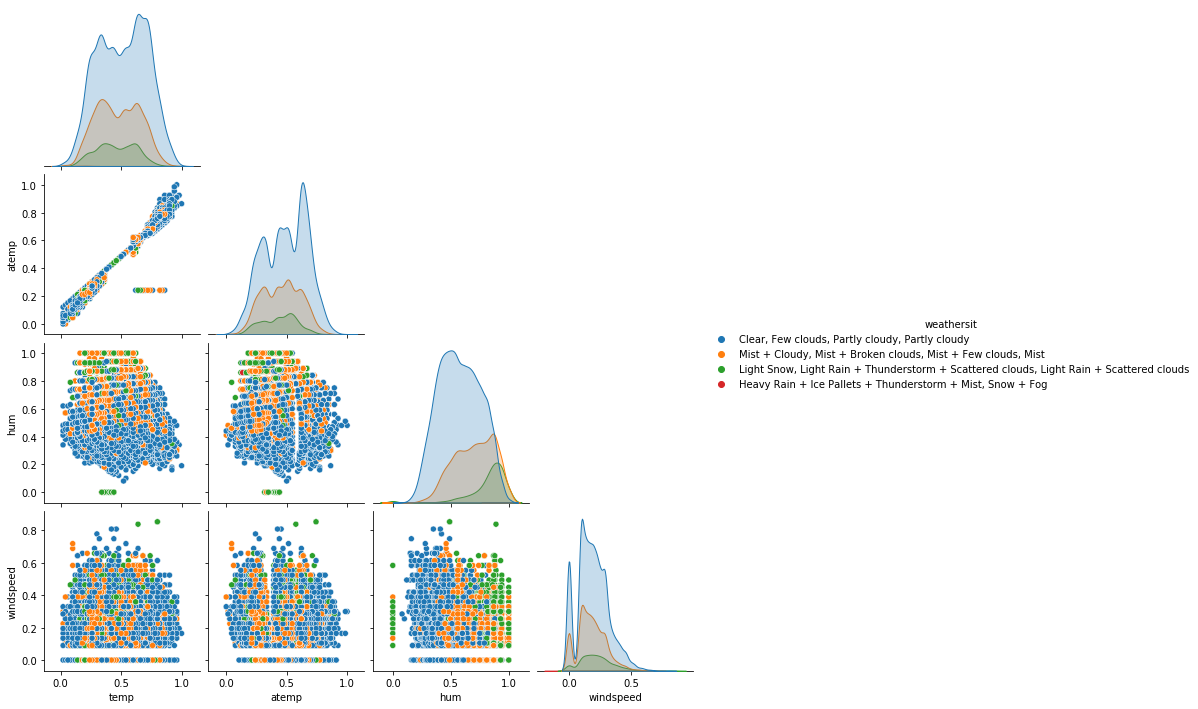

In [22]:
# Check Distributions
sns.pairplot(df[["weathersit","temp","atemp","hum","windspeed"]], diag_kind="kde", corner=True, hue = "weathersit");


**Insights:** TBD

### 1.3 Bike-user related data

In [23]:
# What we already know
df_info.loc[["casual","registered","cnt"]]

# casual: count of casual users
# registered: count of registered users
# cnt: count of total rental bikes including both casual and registered

,0,missing,unique,count,min,max,mean,stdev
casual,int64,0,322,17379,0,367,35.676,49.305
registered,int64,0,776,17379,0,886,153.787,151.357
cnt,int64,0,869,17379,1,977,189.463,181.388


In [24]:
# Sense-check
# df["casual"].unique()
# df["registered"].unique()
# df["cnt"].unique()

In [25]:
# Check for outliers

col = "registered"
lowerbound,upperbound = get_borders(df[col]) # using above pre-defined function 
outliers = pd.DataFrame(df[(df[col] < lowerbound) | (df[col] > upperbound)][col])

# Print outliers
#outliers

# Get number of outliers
outliers.shape

(45, 1)

Checking for outliers, we find the following numbers of outliers:
- casual: 491 outliers (at +/- 3.0x IQR)
- registered: 45 outliers (at +/- 3.0x IQR)
- cnt: 0 outliers

We can also analyze those outliers visually using boxplots. 
Box plots are a graphical depiction of numerical data through their quantiles and they are very effective in showing outliers. The ends of the box show the 1st and the 3rd quartile while the lower and upper whiskers mark the boundaries of the data distribution. Any data points above or below the whiskers can be considered as outliers or anomalous.


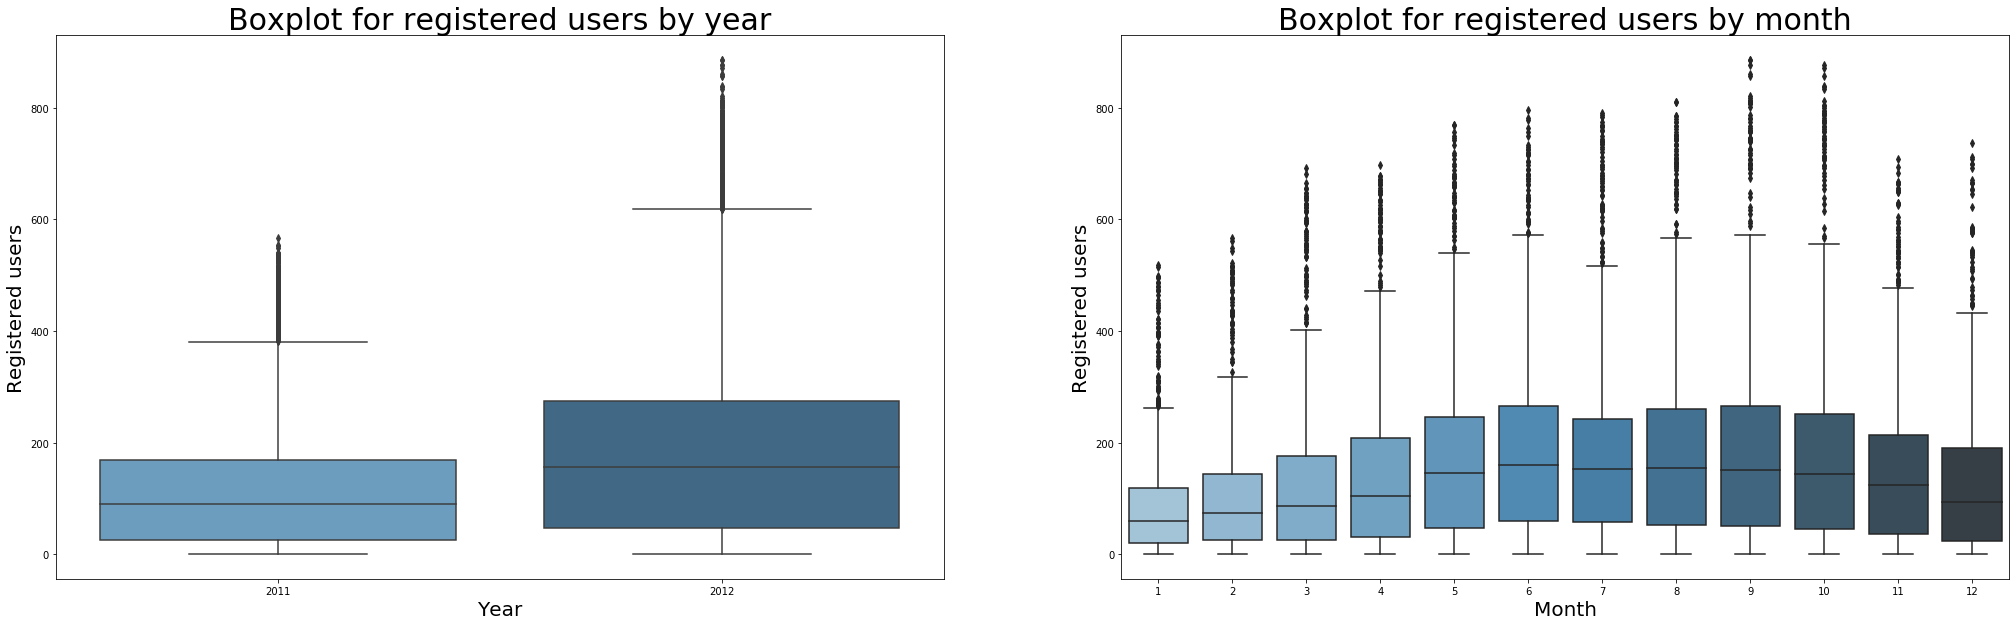

In [26]:
# Analyzing Registered Users by Year and by Month 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(35, 10))

sns.boxplot(x="year", y="registered", data=df, ax=ax1, palette="Blues_d")
ax1.set_title("Boxplot for registered users by year",fontsize = 30)
ax1.set_xlabel("Year" , fontsize = 20)
ax1.set_ylabel("Registered users" , fontsize = 20);

sns.boxplot(x="month", y="registered", data=df, ax=ax2, palette="Blues_d")
ax2.set_title("Boxplot for registered users by month",fontsize = 30)
ax2.set_xlabel("Month" , fontsize = 20)
ax2.set_ylabel("Registered users" , fontsize = 20);

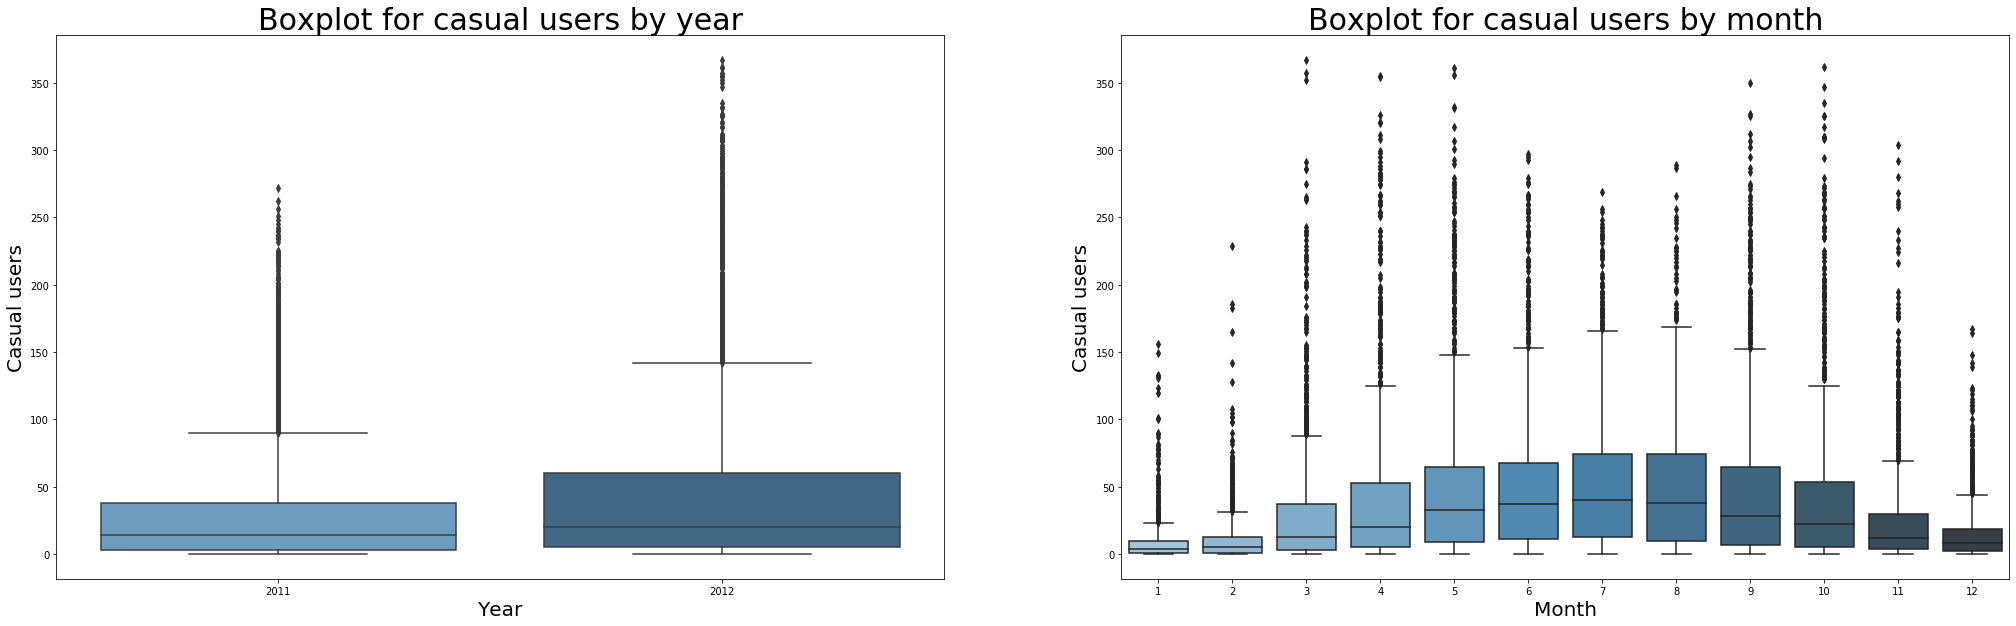

In [27]:
# Analyzing Casual Users by Year and by Month 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(35, 10))

sns.boxplot(x="year", y="casual", data=df, ax=ax1, palette="Blues_d")
ax1.set_title("Boxplot for casual users by year",fontsize = 30)
ax1.set_xlabel("Year" , fontsize = 20)
ax1.set_ylabel("Casual users" , fontsize = 20);

sns.boxplot(x="month", y="casual", data=df, ax=ax2, palette="Blues_d")
ax2.set_title("Boxplot for casual users by month",fontsize = 30)
ax2.set_xlabel("Month" , fontsize = 20)
ax2.set_ylabel("Casual users" , fontsize = 20);

Let's also inspect how the number of total bike rentals is related to the number of casual and registered users: 

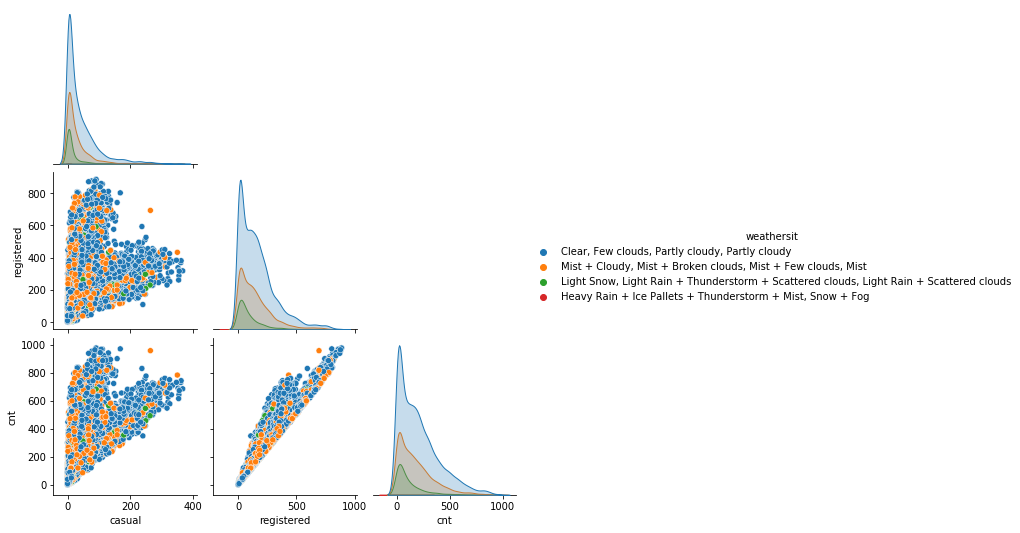

In [28]:
# Check Distributions
sns.pairplot(df[["weathersit","casual","registered","cnt"]], corner=True, hue = "weathersit");


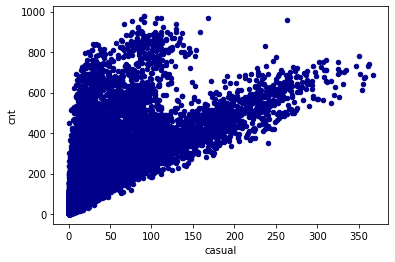

In [29]:
# Scatter Plot casual  & count
ax1 = df.plot.scatter(x='casual',
                      y='cnt',
                      c='DarkBlue')

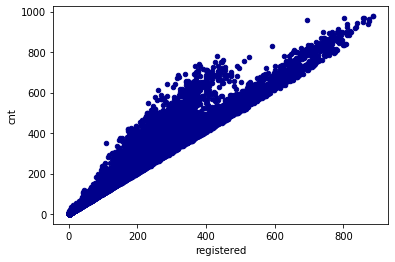

In [30]:
# Scatter Plot registered  & count
ax1 = df.plot.scatter(x='registered',
                      y='cnt',
                      c='DarkBlue')

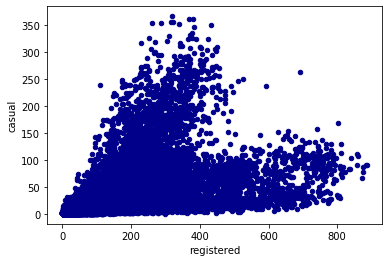

In [31]:
# Scatter Plot registered  & casual
ax1 = df.plot.scatter(x='registered',
                      y='casual',
                      c='DarkBlue')

**Insights:** TBD

### 1.4 Correlations between variables

In [32]:
# Studying the influence of combinations of features (not just individual features).
# Checking possibly redundant variables via correlations.

In [33]:
# Calculate correlation matrix
corr = df.corr()

# Plot correlation matrix 
corr.style.background_gradient(cmap='coolwarm') 


,hr,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_of_week
hr,1.000,0.137,0.134,-0.276,0.138,0.301,0.374,0.394,-0.004,-0.006,0.002,-0.003
temp,0.137,1.000,0.988,-0.070,-0.023,0.460,0.336,0.405,0.042,0.201,0.027,-0.036
atemp,0.134,0.988,1.000,-0.052,-0.063,0.454,0.333,0.401,0.040,0.208,0.021,-0.039
hum,-0.276,-0.070,-0.052,1.000,-0.290,-0.347,-0.274,-0.323,-0.084,0.165,0.026,-0.035
windspeed,0.138,-0.023,-0.063,-0.290,1.000,0.090,0.083,0.094,-0.008,-0.135,0.011,0.003
casual,0.301,0.460,0.454,-0.347,0.090,1.000,0.507,0.695,0.143,0.068,-0.003,0.242
registered,0.374,0.336,0.333,-0.274,0.083,0.507,1.000,0.972,0.254,0.122,-0.004,-0.086
cnt,0.394,0.405,0.401,-0.323,0.094,0.695,0.972,1.000,0.250,0.121,-0.004,-0.006
year,-0.004,0.042,0.040,-0.084,-0.008,0.143,0.254,0.250,1.000,-0.010,0.002,0.001
month,-0.006,0.201,0.208,0.165,-0.135,0.068,0.122,0.121,-0.010,1.000,0.008,0.003


**Insights:** 
- "temp" and "atemp" are highly correlated. The variables contain redundant information and one should be removed
- High correlation between "cnt" and "registered" 
- Some correlation between "cnt" and "casual", as well as "registered" and "casual"

We can already make first inferences, for example that the number of casual bike users is positvely correlated with temperature, suggesting that warmer weather drives more casual users to rent bikes, whereas such relation is weaker for registered users

### 1.5 Further Insights

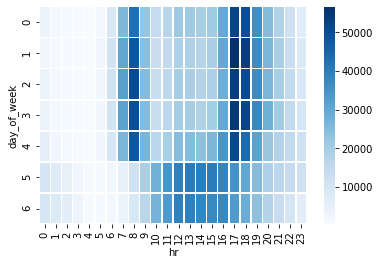

In [34]:
# How do number of users differ for different days of the week: 

data = df.groupby(["day_of_week","hr"])["cnt"].agg("sum").unstack().sort_index()
plt.figsize = (20,20)
sns.heatmap(data, cmap='Blues', linewidth=0.5)


We can see a clear pattern between weekend and weekdays: Monday to Friday (day_of_week 0 to 5) the busiest hours are in the morning at 8am and in the evening at 5-6pm (with Friday being easing slightly earlier). On the weekends however, those are rather quiet hours, instead usage is rather spread out throughout the day with main hours between noon and 3/4 pm (but less intense than on weekdays main hours)


<Figure size 432x288 with 0 Axes>

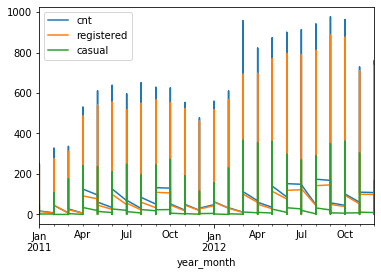

In [35]:
# How have user numbers been growing over the past 2 years?
plt.figure()

df.plot( x='year_month', y=["cnt","registered","casual"])


# 2. Data Engineering

In [36]:
df.dtypes

dteday         datetime64[ns]
hr                      int64
weathersit             object
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
year                    int64
month                   int64
day                     int64
day_name               object
day_of_week             int64
year_month          period[M]
dtype: object

In [37]:
df.isna().sum()

dteday           0
hr               0
weathersit     100
temp            99
atemp          100
hum            100
windspeed      100
casual           0
registered       0
cnt              0
year             0
month            0
day              0
day_name         0
day_of_week      0
year_month       0
dtype: int64

### 2.1 Imputing missing values

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [40]:
imp_temp=imp.fit(df[['temp']])
df['temp']=imp_temp.transform(df[['temp']]).ravel()

In [41]:
imp_atemp=imp.fit(df[['atemp']])
df['atemp']=imp_temp.transform(df[['atemp']]).ravel()

In [42]:
imp_hum=imp.fit(df[['hum']])
df['hum']=imp_temp.transform(df[['hum']]).ravel()

In [43]:
imp_windspeed=imp.fit(df[['windspeed']])
df['windspeed']=imp_temp.transform(df[['windspeed']]).ravel()

In [44]:
#imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [45]:
df['weathersit'] = df['weathersit'].ffill()

#imp_weathersit=imp_cat.fit(df[['weathersit']])
#df['weathersit']=imp_weathersit.transform(df[['weathersit']]).ravel()

In [46]:
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_name,day_of_week,year_month
instant,,,,,,,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.288,0.81,0.0,3,13,16,2011,1,1,Saturday,5,2011-01
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.273,0.80,0.0,8,32,40,2011,1,1,Saturday,5,2011-01
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.273,0.80,0.0,5,27,32,2011,1,1,Saturday,5,2011-01
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.288,0.75,0.0,3,10,13,2011,1,1,Saturday,5,2011-01
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.288,0.75,0.0,0,1,1,2011,1,1,Saturday,5,2011-01


In [47]:
df.dtypes

dteday         datetime64[ns]
hr                      int64
weathersit             object
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual                  int64
registered              int64
cnt                     int64
year                    int64
month                   int64
day                     int64
day_name               object
day_of_week             int64
year_month          period[M]
dtype: object

In [48]:
# Check if no null values after imputation
df.isna().sum()

dteday         0
hr             0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
year           0
month          0
day            0
day_name       0
day_of_week    0
year_month     0
dtype: int64

### 2.2 Creating new features

#### (a) Identifying if the day is working day of weekend

In [49]:
def is_weekend(df):
    if (df["day_of_week"]>=5):
        return "Weekend"
    else:
        return "Working Day"

df["weekend"]=df.apply(is_weekend, axis=1)

In [50]:
df['weekend'].value_counts()

Working Day    12365
Weekend         5014
Name: weekend, dtype: int64

#### (b) Identifying the weather season of the year

In [51]:
def season(df):
    if (df['month'] <=3 or df['month'] ==12):
        season = 'Winter'
    elif((df['month']>=4) & (df['month']<=6)):
        season = 'Spring'
    elif((df['month']>=7) & (df['month']<=8)):
        season = 'Summer'
    else:
        season = 'Autumn'
    if(df['month']==3 & df['day']> 19):
        season = 'Spring'
    elif(df['month']==6 & df['day']> 20):
        season = 'Summer'
    elif(df['month']==9 & df['day']> 21):
        season = 'Autumn'
    return season

df["season"]=df.apply(season, axis=1)

In [52]:
df['season'].value_counts()

Winter    5726
Spring    4365
Autumn    4325
Summer    2963
Name: season, dtype: int64

#### (c) Identifying if early morning, morning, afternoon, evening, night of late night

In [53]:
def part_of_day(df):
    if (df['hr'] > 4) & (df['hr'] <= 8):
        return 'Early Morning'
    elif (df['hr'] > 8) & (df['hr'] <= 12):
        return 'Morning'
    elif (df['hr'] > 12) & (df['hr'] <= 16):
        return'Afternoon'
    elif (df['hr'] > 16) & (df['hr'] <= 20) :
        return 'Evening'
    elif (df['hr'] > 20) & (df['hr'] <=23 ):
        return'Night'
    elif (df['hr'] >= 0) & (df['hr'] <= 4):
        return'Late Night'

df['moment_of_day']=df.apply(part_of_day,axis=1)

In [54]:
df['moment_of_day'].value_counts()

Late Night       3559
Afternoon        2917
Evening          2914
Morning          2909
Early Morning    2896
Night            2184
Name: moment_of_day, dtype: int64

#### (d) Identifying holidays in US

In [55]:
min_date=str(df["dteday"].min())
max_date=str(df["dteday"].max())

In [56]:
min_date=min_date[:10]

In [57]:
max_date=max_date[:10]

In [58]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start=min_date, end=max_date)
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df['Holiday'] = df['dteday'].isin(holidays)


In [59]:
df['Holiday'].value_counts()

False    16927
True       452
Name: Holiday, dtype: int64

# 3. Predictive Analysis

### 3.0 Splitting Train & Test set

In [60]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import ensemble
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [61]:
set_config(display="diagram")

In [62]:
X = df.drop(columns = ["casual","registered","cnt"])
y = df[["dteday","cnt"]]

In [63]:
X_train = X[(X['dteday'] < '2012-10-01')]
X_test = X[(X['dteday'] >= '2012-10-01')]
y_train = y[(y['dteday'] < '2012-10-01')]
y_test = y[(y['dteday'] >= '2012-10-01')]

In [64]:
y_train = y_train.drop(columns = 'dteday')
y_test = y_test.drop(columns = 'dteday')

As we could see in the distribution of `cnt` in the Exploratory Data Analysis, `cnt` is right skewed, so we've decided to log the target variable.

In [65]:
y_train_log = np.log(y_train.values.tolist())

---

### 3.1 Preprocessing

In [66]:
bare_preprocessing = ColumnTransformer([

    ("one_hot_encoder", Pipeline([
        ("enc", OneHotEncoder())
    ]), ["weathersit","weekend","season","moment_of_day"]),

    ("dropper", "drop", ["dteday", "temp", "year_month","day_name"]),

], remainder="passthrough")

bare_preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder',
                                 Pipeline(steps=[('enc', OneHotEncoder())]),
                                 ['weathersit', 'weekend', 'season',
                                  'moment_of_day']),
                                ('dropper', 'drop',
                                 ['dteday', 'temp', 'year_month', 'day_name'])])

In [67]:
time_ohe_preprocessing = ColumnTransformer([

    ("one_hot_encoder", Pipeline([
        ("enc", OneHotEncoder(handle_unknown="ignore"))
    ]), ["weathersit","weekend","season","moment_of_day", "day_name", "month"]),

    ("dropper", "drop", ["dteday", "temp", "year_month","day_of_week","day","hr"]),

    ],  
    remainder="passthrough",
    sparse_threshold = 0)

time_ohe_preprocessing

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('one_hot_encoder',
                                 Pipeline(steps=[('enc',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['weathersit', 'weekend', 'season',
                                  'moment_of_day', 'day_name', 'month']),
                                ('dropper', 'drop',
                                 ['dteday', 'temp', 'year_month', 'day_of_week',
                                  'day', 'hr'])])

In [68]:
bare_preprocessing.fit_transform(X_train)[0]

array([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0, 0.2879, 0.81, 0.0, 2011, 1, 1, 5, False],
      dtype=object)

In [69]:
num_feature= bare_preprocessing.fit_transform(X_train)[0]
len(num_feature)

25

In [70]:
time_ohe_preprocessing.fit_transform(X_train)[0]

array([1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2879, 0.81, 0.0,
       2011, False], dtype=object)

In [71]:
num_feature = time_ohe_preprocessing.fit_transform(X_train)[0]
len(num_feature)

40

In [72]:
bare_preprocessing.named_transformers_["one_hot_encoder"]["enc"].get_feature_names()

array(['x0_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'x0_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
       'x0_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'x0_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'x1_Weekend', 'x1_Working Day', 'x2_Autumn', 'x2_Spring',
       'x2_Summer', 'x2_Winter', 'x3_Afternoon', 'x3_Early Morning',
       'x3_Evening', 'x3_Late Night', 'x3_Morning', 'x3_Night'],
      dtype=object)

In [73]:
time_ohe_preprocessing.named_transformers_["one_hot_encoder"]["enc"].get_feature_names()

array(['x0_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'x0_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
       'x0_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'x0_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'x1_Weekend', 'x1_Working Day', 'x2_Autumn', 'x2_Spring',
       'x2_Summer', 'x2_Winter', 'x3_Afternoon', 'x3_Early Morning',
       'x3_Evening', 'x3_Late Night', 'x3_Morning', 'x3_Night',
       'x4_Friday', 'x4_Monday', 'x4_Saturday', 'x4_Sunday',
       'x4_Thursday', 'x4_Tuesday', 'x4_Wednesday', 'x5_1', 'x5_2',
       'x5_3', 'x5_4', 'x5_5', 'x5_6', 'x5_7', 'x5_8', 'x5_9', 'x5_10',
       'x5_11', 'x5_12'], dtype=object)

We have created two proprocessing methods:

1. bare_preprocessing: keeping all the columns except `year_month` (redundancy), `temp` (highly correlated with `atemp`) and one-hot-encode the categorical columns

2. time_ohe_preprocessing: treating all time related columns (except for day because such granular breakdown may overfit) as categorical, therefore one-hot-encode `day_name` and `month`


---

### 3.2 Cross Validation on Baseline Models

We are creating dictionaries to store the cross validation results.

In [74]:
bare_results = {}
time_ohe_results = {}

---

### Linear Regression

In [75]:
lr_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", linear_model.LinearRegression())
])

In [76]:
scores = cross_val_score(lr_baseline, X_train, y_train_log, cv = 5, scoring = "r2")
lr_baseline_score = scores.mean()
bare_results["lr_baseline_score"] = lr_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634}

---

In [77]:
lr_time_ohe = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", linear_model.LinearRegression())
])

In [78]:
scores = cross_val_score(lr_time_ohe, X_train, y_train_log, cv = 5, scoring = "r2")
lr_time_ohe_score = scores.mean()
time_ohe_results["lr_time_ohe_score"] = lr_time_ohe_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25}

---

### Ridge

In [79]:
rigde_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", linear_model.Ridge(alpha = 0.5))
])

In [80]:
scores = cross_val_score(rigde_baseline, X_train, y_train_log, cv = 5, scoring = "r2")
rigde_baseline_score = scores.mean()
bare_results["rigde_baseline_score"] = rigde_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634,
 'rigde_baseline_score': 0.6261562871817187}

---

In [81]:
ridge_time_ohe = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", linear_model.Ridge(alpha = 0.5))
])

In [82]:
scores = cross_val_score(ridge_time_ohe, X_train, y_train_log, cv = 5, scoring = "r2")
ridge_time_ohe_score = scores.mean()
time_ohe_results["ridge_time_ohe_score"] = ridge_time_ohe_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25,
 'ridge_time_ohe_score': 0.6245428108174245}

### Lasso

In [83]:
lasso_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", linear_model.Lasso(alpha = 0.5))
])

In [84]:
scores = cross_val_score(lasso_baseline, X_train, y_train_log, cv = 5, scoring = "r2")
lasso_baseline_score = scores.mean()
bare_results["lasso_baseline_score"] = lasso_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634,
 'rigde_baseline_score': 0.6261562871817187,
 'lasso_baseline_score': 0.18638496188407214}

---

In [85]:
lasso_time_ohe = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", linear_model.Lasso(alpha = 0.5))
])

In [86]:
scores = cross_val_score(lasso_time_ohe, X_train, y_train_log, cv = 5, scoring = "r2")
lasso_time_ohe_score = scores.mean()
time_ohe_results["lasso_time_ohe_score"] = lasso_time_ohe_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25,
 'ridge_time_ohe_score': 0.6245428108174245,
 'lasso_time_ohe_score': -0.12928293982581876}

---

### SVM

In [87]:
svm_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", svm.SVR())
])

In [88]:
scores = cross_val_score(svm_baseline, X_train, y_train_log.ravel(), cv = 5, scoring = "r2")
svm_baseline_score = scores.mean()
bare_results["svm_baseline_score"] = svm_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634,
 'rigde_baseline_score': 0.6261562871817187,
 'lasso_baseline_score': 0.18638496188407214,
 'svm_baseline_score': -0.11059353838930122}

---

In [89]:
svm_time_ohe = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", svm.SVR())
])

In [90]:
scores = cross_val_score(svm_time_ohe, X_train, y_train_log.ravel(), cv = 5, scoring = "r2")
svm_time_ohe_score = scores.mean()
time_ohe_results["svm_time_ohe_score"] = svm_time_ohe_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25,
 'ridge_time_ohe_score': 0.6245428108174245,
 'lasso_time_ohe_score': -0.12928293982581876,
 'svm_time_ohe_score': -0.20981639835097052}

---

### Decision Tree

In [91]:
dt_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", tree.DecisionTreeRegressor(random_state = 42))
])

In [92]:
scores = cross_val_score(dt_baseline, X_train,  y_train_log.ravel(), cv = 5, scoring = "r2")
dt_baseline_score = scores.mean()
bare_results["dt_baseline_socre"] = dt_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634,
 'rigde_baseline_score': 0.6261562871817187,
 'lasso_baseline_score': 0.18638496188407214,
 'svm_baseline_score': -0.11059353838930122,
 'dt_baseline_socre': 0.8073071868568732}

---

In [93]:
dt_time_ohe = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", tree.DecisionTreeRegressor(random_state = 42))
])

In [94]:
scores = cross_val_score(dt_time_ohe, X_train,  y_train_log.ravel(), cv = 5, scoring = "r2")
dt_time_ohe_score = scores.mean()
time_ohe_results["dt_time_ohe_score"] = dt_time_ohe_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25,
 'ridge_time_ohe_score': 0.6245428108174245,
 'lasso_time_ohe_score': -0.12928293982581876,
 'svm_time_ohe_score': -0.20981639835097052,
 'dt_time_ohe_score': 0.421640487444519}

---

### Random Forest

In [95]:
rf_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", ensemble.RandomForestRegressor(random_state = 42))
])

In [96]:
scores = cross_val_score(rf_baseline, X_train, y_train_log.ravel(), cv = 5, scoring = "r2")
rf_baseline_score = scores.mean()
bare_results["rf_baseline_score"] = rf_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634,
 'rigde_baseline_score': 0.6261562871817187,
 'lasso_baseline_score': 0.18638496188407214,
 'svm_baseline_score': -0.11059353838930122,
 'dt_baseline_socre': 0.8073071868568732,
 'rf_baseline_score': 0.8807275080239434}

---

In [97]:
rf_time_oh = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", ensemble.RandomForestRegressor(random_state = 42))
])

In [98]:
scores = cross_val_score(rf_time_oh, X_train, y_train_log.ravel(), cv = 5, scoring = "r2")
rf_time_oh_score = scores.mean()
time_ohe_results["rf_time_oh_score"] = rf_time_oh_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25,
 'ridge_time_ohe_score': 0.6245428108174245,
 'lasso_time_ohe_score': -0.12928293982581876,
 'svm_time_ohe_score': -0.20981639835097052,
 'dt_time_ohe_score': 0.421640487444519,
 'rf_time_oh_score': 0.681028522772743}

---

### XG Boost

In [99]:
xgb_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", xgb.XGBRegressor(random_state = 42,objective ='reg:squarederror'))
])

In [100]:
scores = cross_val_score(xgb_baseline, X_train, y_train_log.ravel(), cv = 5, scoring = "r2")
xgb_baseline_score = scores.mean()
bare_results["xgb_baseline_score"] = xgb_baseline_score
bare_results

{'lr_baseline_score': 0.6262669658156634,
 'rigde_baseline_score': 0.6261562871817187,
 'lasso_baseline_score': 0.18638496188407214,
 'svm_baseline_score': -0.11059353838930122,
 'dt_baseline_socre': 0.8073071868568732,
 'rf_baseline_score': 0.8807275080239434,
 'xgb_baseline_score': 0.8663154766293669}

---

In [101]:
xgb_time_ohe = Pipeline([
    ("preprocessing", time_ohe_preprocessing),
    ("regressor", xgb.XGBRegressor(random_state = 42, objective ='reg:squarederror'))
])

In [102]:
scores = cross_val_score(xgb_time_ohe, X_train, y_train_log.ravel(), cv = 5, scoring = "r2")
xgb_time_ohe_score = scores.mean()
time_ohe_results["xgb_time_ohe_score"] = xgb_time_ohe_score
time_ohe_results

{'lr_time_ohe_score': -9.471882646341063e+25,
 'ridge_time_ohe_score': 0.6245428108174245,
 'lasso_time_ohe_score': -0.12928293982581876,
 'svm_time_ohe_score': -0.20981639835097052,
 'dt_time_ohe_score': 0.421640487444519,
 'rf_time_oh_score': 0.681028522772743,
 'xgb_time_ohe_score': 0.7031868498334342}

---

### Alternative: Use GridSearch to compare proprocessing methods & models

The above baseline models search could be done similarly with GridSearch, however in an ideal situation we would like to tune more models, hence we've still run the aboves model experiments.

In [103]:
param_grid = [
    {"preprocessing": [bare_preprocessing, time_ohe_preprocessing],
     "regressor": [linear_model.LinearRegression(), linear_model.Lasso(),
                   linear_model.Ridge(), svm.SVR(), tree.DecisionTreeRegressor(random_state = 42),
                   ensemble.RandomForestRegressor(random_state = 42), xgb.XGBRegressor(random_state = 42)
                  ]}
]

In [104]:
gs = GridSearchCV(lr_baseline, 
                  param_grid,
                  scoring = "r2",
                  cv = 5,
                  n_jobs = -1,
                  )

In [105]:
gs.fit(X_train, y_train_log.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_encoder',
                                                                         Pipeline(steps=[('enc',
                                                                                          OneHotEncoder())]),
                                                                         ['weathersit',
                                                                          'weekend',
                                                                          'season',
                                                                          'moment_of_day']),
                                                                        ('dropper',
                                                                         'drop',
                                                                         ['dteday',
                                                                          'temp',
                                                                          'year_month',
                                                                          'day_name'])])),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid=[...
                                                                                              OneHotEncoder(handle_unknown='ignore'))]),
                                                                             ['weathersit',
                                                                              'weekend',
                                                                              'season',
                                                                              'moment_of_day',
                                                                              'day_name',
                                                                              'month']),
                                                                            ('dropper',
                                                                             'drop',
                                                                             ['dteday',
                                                                              'temp',
                                                                              'year_month',
                                                                              'day_of_week',
                                                                              'day',
                                                                              'hr'])])],
                          'regressor': [LinearRegression(), Lasso(), Ridge(),
                                        SVR(),
                                        DecisionTreeRegressor(random_state=42),
                                        RandomForestRegressor(random_state=42),
                                        XGBRegressor(random_state=42)]}],
             scoring='r2')

In [106]:
gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder())]),
                                                  ['weathersit', 'weekend',
                                                   'season', 'moment_of_day']),
                                                 ('dropper', 'drop',
                                                  ['dteday', 'temp',
                                                   'year_month',
                                                   'day_name'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [107]:
gs.best_score_

0.8807275080239434

In [108]:
gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder())]),
                                                  ['weathersit', 'weekend',
                                                   'season', 'moment_of_day']),
                                                 ('dropper', 'drop',
                                                  ['dteday', 'temp',
                                                   'year_month',
                                                   'day_name'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

The highest score we've obtained from cross validation is 0.88 from Random Forest.

---

### 3.3 Hyperparameter Tuning with shortlisted Model

The model we've selected is Random Forest paired with the `bare_preprocessing` combination, we will look at its current hyperparameter and see if we could improve it.

### GridSearch to find the best hyperparameter

In [109]:
gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('one_hot_encoder',
                                    Pipeline(steps=[('enc', OneHotEncoder())]),
                                    ['weathersit', 'weekend', 'season',
                                     'moment_of_day']),
                                   ('dropper', 'drop',
                                    ['dteday', 'temp', 'year_month', 'day_name'])])),
  ('regressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'preprocessing': ColumnTransformer(remainder='passthrough',
                   transformers=[('one_hot_encoder',
                                  Pipeline(steps=[('enc', OneHotEncoder())]),
                                  ['weathersit', 'weekend', 'season',
                                   'moment_of_day']),
                                 ('dropper', 'drop',
                                  ['dteday', 'temp', 'year

In [110]:
param_grid = [
    {"regressor__max_depth": [None, 10, 50 ,100],
     "regressor__max_features": ['auto', 'sqrt'],
     "regressor__min_samples_leaf": [1, 2, 5],
     "regressor__n_estimators": [10, 20, 30, 50, 100],
     "regressor__bootstrap": [True, False],
    }]

In [111]:
gs_rf = GridSearchCV(rf_baseline, 
                     param_grid, 
                     cv = 5, 
                     scoring = "r2",
                     n_jobs = -1)

In [112]:
gs_rf.fit(X_train, y_train_log.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_encoder',
                                                                         Pipeline(steps=[('enc',
                                                                                          OneHotEncoder())]),
                                                                         ['weathersit',
                                                                          'weekend',
                                                                          'season',
                                                                          'moment_of_day']),
                                                                        ('dropper',
                                                                         'drop',
                                                                         ['dteday',
                                                                          'temp',
                                                                          'year_month',
                                                                          'day_name'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'regressor__bootstrap': [True, False],
                          'regressor__max_depth': [None, 10, 50, 100],
                          'regressor__max_features': ['auto', 'sqrt'],
                          'regressor__min_samples_leaf': [1, 2, 5],
                          'regressor__n_estimators': [10, 20, 30, 50, 100]}],
             scoring='r2')

In [113]:
y_pred = np.exp(gs_rf.predict(X_test))

In [114]:
gs_rf_score = r2_score(y_test, y_pred)

In [115]:
gs_rf_score

0.8475736208722919

In [116]:
gs_rf.best_params_

{'regressor__bootstrap': True,
 'regressor__max_depth': None,
 'regressor__max_features': 'auto',
 'regressor__min_samples_leaf': 1,
 'regressor__n_estimators': 100}

---

### 3.4 Plotting Model & Residuals

In [117]:
import matplotlib.pyplot as plt

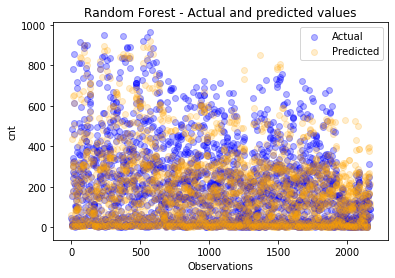

In [118]:
plt.scatter(x = range(0, len(y_test)), y=y_test, c = 'Blue', label = 'Actual', alpha = 0.3)
plt.scatter(x = range(0, len(y_pred)), y=y_pred, c = 'Orange', label = 'Predicted', alpha = 0.2)
plt.title('Random Forest - Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('cnt')
plt.legend();

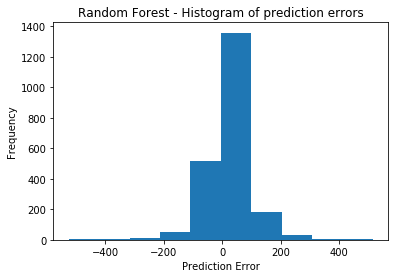

In [119]:
diff = ((y_test['cnt'].values) - y_pred )
diff = pd.Series(diff)
diff.plot.hist()
plt.title('Random Forest - Histogram of prediction errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency');

The residuals are centered around 0 as the mean, with a roughly normal distribution.

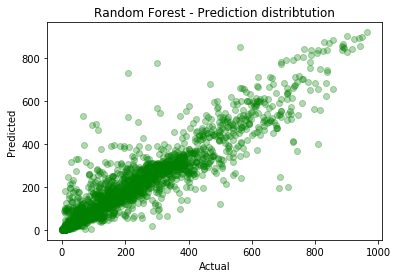

In [120]:
plt.scatter(x = y_test, y= y_pred, c = 'Green', alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Prediction distribtution');

We could see our model does not have heteroscedasticity, the residual does not increase as y increases.

In [121]:
trees_range = range(1, 250, 10)

error_results = []

# looping through values of trees
for i, trees in enumerate(trees_range):
    
    # train
    rf_baseline = Pipeline([
    ("preprocessing", bare_preprocessing),
    ("regressor", ensemble.RandomForestRegressor(n_estimators=trees))
    ])
    rf_baseline.fit(X_train, y_train_log.ravel())
    
    # predict
    y_hat_train = rf_baseline.predict(X_train)
    y_hat_test = rf_baseline.predict(X_test)
    
    # evaluate
    r2_train = r2_score(y_train, np.exp(y_hat_train))
    r2_test = r2_score(y_test, np.exp(y_hat_test))
    
    # store results
    error_results.append({
        "n_trees": trees, 
        "r2_train": r2_train,
        "r2_test": r2_test
    })
    
    # print evolution of loop:
    print(f"N_trees: {trees}, r2_train: {r2_train:.3f}, r2_test={r2_test:.3f}")
    
# saving results as dataframe
results = pd.DataFrame(error_results)

# plotting


N_trees: 1, r2_train: 0.957, r2_test=0.710
N_trees: 11, r2_train: 0.990, r2_test=0.839
N_trees: 21, r2_train: 0.991, r2_test=0.843
N_trees: 31, r2_train: 0.992, r2_test=0.839
N_trees: 41, r2_train: 0.992, r2_test=0.847
N_trees: 51, r2_train: 0.992, r2_test=0.823
N_trees: 61, r2_train: 0.992, r2_test=0.835
N_trees: 71, r2_train: 0.992, r2_test=0.846
N_trees: 81, r2_train: 0.992, r2_test=0.841
N_trees: 91, r2_train: 0.992, r2_test=0.836
N_trees: 101, r2_train: 0.993, r2_test=0.829
N_trees: 111, r2_train: 0.992, r2_test=0.841
N_trees: 121, r2_train: 0.993, r2_test=0.840
N_trees: 131, r2_train: 0.993, r2_test=0.847
N_trees: 141, r2_train: 0.993, r2_test=0.845
N_trees: 151, r2_train: 0.993, r2_test=0.846
N_trees: 161, r2_train: 0.993, r2_test=0.834
N_trees: 171, r2_train: 0.993, r2_test=0.837
N_trees: 181, r2_train: 0.993, r2_test=0.838
N_trees: 191, r2_train: 0.993, r2_test=0.840
N_trees: 201, r2_train: 0.993, r2_test=0.838
N_trees: 211, r2_train: 0.993, r2_test=0.846
N_trees: 221, r2_trai

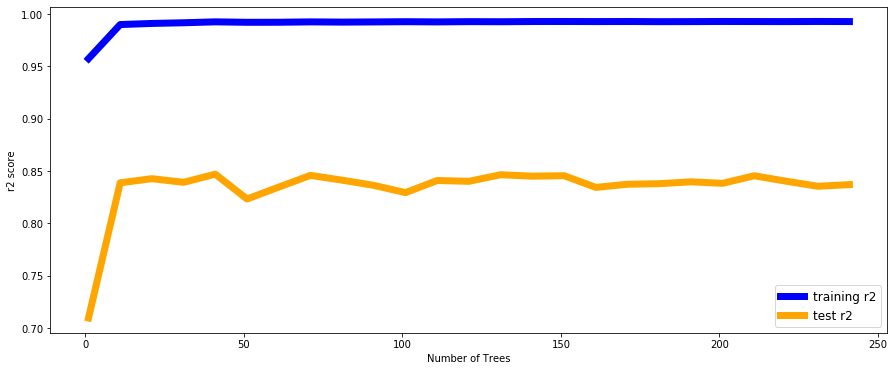

In [122]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(results["n_trees"], results["r2_train"], label="training r2", color="blue", linewidth = 7)
ax.plot(results["n_trees"], results["r2_test"], label="test r2", color="orange", linewidth = 7)
ax.legend(fontsize=12)
plt.xlabel("Number of Trees")
plt.ylabel("r2 score")
plt.show();

From the graph above, we could see that for the random forest model trained, 30-50 trees are enough to generated relatively high r2 on the test set, the more trees does not help improve r2.

Thank you!
<iframe src="https://giphy.com/embed/l2R0eYcNq9rJUsVAA" width="480" height="288" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/latelateshow-james-corden-late-show-l2R0eYcNq9rJUsVAA">via GIPHY</a></p>